<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210706%5D_EDC_Cracking_Deriviations_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDC Cracking Deriviations Data Preprocessing

https://en.wikipedia.org/wiki/Arrhenius_equation

In [107]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
 # Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
dataset= pd.read_csv(filename)

Saving TECHN.csv to TECHN (6).csv


In [109]:
dataset

,temp,p,no,0ppm,200ppm,400ppm,600ppm,800ppm,1000ppm,1200ppm,1400ppm,1600ppm,2000 ppm,2500 ppm
0,324.7,11.40,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,350.0,11.36,1,0.521164,0.522199,0.522365,0.522339,0.522780,0.523014,0.523264,0.523629,0.523948,0.524265,0.524512
2,374.7,11.32,2,1.264740,1.266985,1.270039,1.271721,1.273495,1.274979,1.276487,1.278065,1.279184,1.281570,1.284193
3,399.3,11.27,3,2.323532,2.338824,2.350183,2.359753,2.368227,2.375934,2.383101,2.390065,2.396244,2.407976,2.421589
4,424.0,11.22,4,3.913078,3.971833,4.020674,4.063351,4.101876,4.137400,4.170501,4.201660,4.231296,4.286329,4.349787
5,451.3,11.17,5,7.038567,7.300785,7.531622,7.741569,7.936005,8.118424,8.291328,8.456067,8.614056,8.913114,9.261672
6,460.7,11.11,6,10.306786,10.808612,11.256860,11.666493,12.046700,12.402982,12.739285,13.058335,13.362346,13.931772,14.583877
7,466.0,11.05,7,13.932304,14.660144,15.305010,15.888112,16.421865,16.915613,17.375776,17.807217,18.213583,18.963068,19.803576
8,471.3,11.00,8,18.642807,19.560110,20.359735,21.072657,21.717087,22.307127,22.851570,23.358025,23.831696,24.698040,25.659225
9,476.7,10.94,9,24.359924,25.360992,26.231483,27.005661,27.704718,28.343033,28.931835,29.478745,29.989864,30.923542,31.958382


In [206]:
dataset.columns
len(dataset.columns)

14

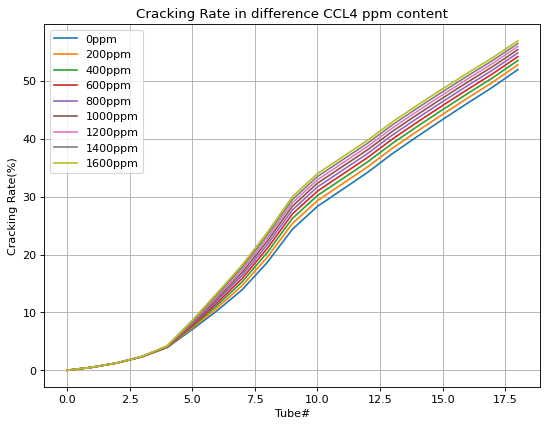

<Figure size 432x288 with 0 Axes>

In [110]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.plot(dataset[["no"]],dataset[["0ppm"]],label='0ppm')
plt.plot(dataset[["no"]],dataset[["200ppm"]],label='200ppm')
plt.plot(dataset[["no"]],dataset[["400ppm"]],label='400ppm')
plt.plot(dataset[["no"]],dataset[["600ppm"]],label='600ppm')
plt.plot(dataset[["no"]],dataset[["800ppm"]],label='800ppm')
plt.plot(dataset[["no"]],dataset[["1000ppm"]],label='1000ppm')
plt.plot(dataset[["no"]],dataset[["1200ppm"]],label='1200ppm')
plt.plot(dataset[["no"]],dataset[["1400ppm"]],label='1400ppm')
plt.plot(dataset[["no"]],dataset[["1600ppm"]],label='1600ppm')

plt.title("Cracking Rate in difference CCL4 ppm content",) 
plt.ylabel("Cracking Rate(%)",) 
plt.xlabel("Tube#",)
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("CR.png")

# Defined reactor parameters to calculate reaction rate k

In [111]:
import math

D = 0.2027        # tube inside diameter 0.2027 (m)
L = 18          # tube length 18 (m)
NTube = 18        # Number of tubes
mdot_in_kg = 36000    # In-tube flow rate (kg/hr)
mdot_in_mole = 363.7864  # In-tube flow rate (kmole/hr)

HTA = 0.25*math.pi*0.2027**2*18*18 # Total heat transfer area for whole reactor
HTAperTuber = HTA/18        # heat transfer area per tube

In [112]:
def CtoK(temp):
  return temp+273.15

In [113]:
def PkgGtoatm(pressure):
  return (pressure +1)*0.967841

In [114]:
dataset[["temp"]] = CtoK(dataset[["temp"]]) # Transform temp from celsius to kelvin
dataset[["p"]] = PkgGtoatm(dataset[["p"]]) # Transform pressure from kg/cm2G to atm

# Start Deriviation

In [115]:
case = dataset[["no","temp","p","0ppm"]]
case

,no,temp,p,0ppm
0,0,597.85,12.001228,0.000000
1,1,623.15,11.962515,0.521164
2,2,647.85,11.923801,1.264740
3,3,672.45,11.875409,2.323532
4,4,697.15,11.827017,3.913078
5,5,724.45,11.778625,7.038567
6,6,733.85,11.720555,10.306786
7,7,739.15,11.662484,13.932304
8,8,744.45,11.614092,18.642807
9,9,749.85,11.556022,24.359924


In [116]:
case.shape[1] # Gives number of columns 
row_count = case.shape[0] # Gives number of rows
ppm = case.columns[3]

In [117]:
EDC = mdot_in_mole* (1-case[ppm]/100)          #kmole/hr
VCM = mdot_in_mole - mdot_in_mole* (1-case[ppm]/100) #kmole/hr
HCL = VCM                        #kmole/hr
Total_mole = EDC+VCM+HCL                 #kmole/hr

EDC
VCM
HCL
Total_mole

0     363.786400
1     365.682324
2     368.387352
3     372.239094
4     378.021647
5     389.391748
6     401.281084
7     414.470229
8     431.606396
9     452.404492
10    466.768381
11    477.443283
12    488.118185
13    500.019219
14    510.852656
15    521.416719
16    531.728006
17    541.798730
18    552.754523
Name: 0ppm, dtype: float64

In [118]:
R = 8205E-5 # idael gas constant m3.atm.K^-1.mol^-1

In [119]:
# Caclulate Volume Flow per Tube (m3/hr)
VTube = Total_mole*R*case["temp"]/case["p"]
VTube

0     1486.933606
1     1562.977283
2     1642.264238
3     1729.465834
4     1828.294972
5     1965.075096
6     2061.514592
7     2155.328365
8     2269.952294
9     2408.638072
10    2512.785983
11    2592.006804
12    2672.898621
13    2766.520522
14    2862.396026
15    2959.111337
16    3037.748140
17    3113.217200
18    3207.833092
dtype: float64

In [120]:
# Calculate Residence time per tube (s)
Rtime = HTAperTuber/VTube*3600
Rtime

0     1.406309
1     1.337888
2     1.273296
3     1.209095
4     1.143737
5     1.064126
6     1.014346
7     0.970195
8     0.921204
9     0.868162
10    0.832179
11    0.806745
12    0.782330
13    0.755855
14    0.730538
15    0.706661
16    0.688368
17    0.671681
18    0.651869
dtype: float64

In [121]:
EDC

0     363.786400
1     361.890476
2     359.185448
3     355.333706
4     349.551153
5     338.181052
6     326.291716
7     313.102571
8     295.966404
9     275.168308
10    260.804419
11    250.129517
12    239.454615
13    227.553581
14    216.720144
15    206.156081
16    195.844794
17    185.774070
18    174.818277
Name: 0ppm, dtype: float64

In [122]:
ln=[]
for i in range(row_count-1):
  tmp = np.log(EDC[i+1]/EDC[i])
  print(tmp)
  ln = np.append(ln,tmp)  

Rt=[]
for i in range(row_count-1):
  tmp = (Rtime[i]+Rtime[i+1])/2
  print(tmp)
  Rt = np.append(Rt,tmp)  

-0.005225267362590355
-0.007502791707025175
-0.010781457720673448
-0.016407453096667177
-0.03306850346280124
-0.03578959392663808
-0.04126097373276321
-0.056284894939999774
-0.07286300572035619
-0.053612168372431754
-0.041791920665305314
-0.04361494993285347
-0.05097817205221977
-0.04877886662508965
-0.04997330645674429
-0.0513110798264261
-0.05279121723551964
-0.060784240664080225
1.3720985221810298
1.3055919008080803
1.2411954235830285
1.176415894379712
1.103931651236405
1.039236043964031
0.9922702228119218
0.9456992271128384
0.8946828950564435
0.8501706914535287
0.8194620935902205
0.7945373893281051
0.7690924203331679
0.743196374895849
0.718599339990873
0.6975144222385365
0.680024381376725
0.6617751425342132


In [180]:
# Calculate reaction rate k per tube
k = ln/Rt
ln_k = np.log(-k)
ln_k.shape

(18,)

In [182]:
Tr = 1/case["temp"]
Tr.shape

(19,)

In [184]:
Tr_=[]
for i in range(row_count-1):
  tmp = (Tr[i]+Tr[i+1])/2
  print(tmp)
  Tr_ = np.append(Tr_,tmp)  

Tr_.shape

0.001638705213245374
0.0015741586219699005
0.0015153332981787027
0.0014607554726322274
0.0014073845226322424
0.0013715169044207947
0.0013577908302577983
0.0013480894609648934
0.0013384368055020099
0.0013318262952096084
0.0013295222483369294
0.0013283743572805678
0.0013266128197902123
0.001324591613531417
0.0013228393908007435
0.0013210917977682728
0.0013193488161094204
0.0013172638480398596


(18,)

In [197]:
# Linear regression
from sklearn import linear_model
from sklearn.metrics import r2_score
reg_model = linear_model.LinearRegression()
Tr_ = Tr_.reshape(-1,1)
reg_model.fit(Tr_,ln_k)

rmse=np.sqrt(np.mean((reg_model.predict(Tr_)-ln_k)**2))
print("model rmse :", rmse)
print("model R2 score :",r2_score(ln_k,reg_model.predict(Tr_)))

print("ln(A) :",reg_model.intercept_)
print("A :" ,math.exp(reg_model.intercept_))
print("Ea/R :",-reg_model.coef_)
print("Ea :",-reg_model.coef_*1.987)

model rmse : 0.16095569237133192
model R2 score : 0.9709621426601546
ln(A) : 10.336937270106564
A : 30851.395709419216
Ea/R : [9846.03228389]
Ea : [19564.06614809]


Text(0, 0.5, 'ln(k)')

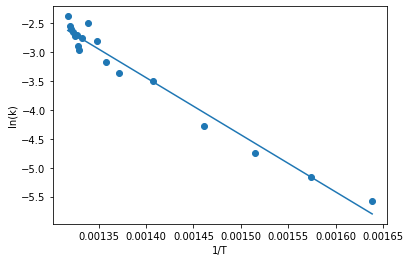

In [188]:
plt.scatter(Tr_,ln_k)
plt.plot(Tr_,reg_model.predict(Tr_))
plt.xlabel("1/T")
plt.ylabel("ln(k)")

In [198]:
print("ln(A) :",11.93186302)
print("A :" ,math.exp(11.93186302))
print("Ea/R :",11068.89434)
print("Ea :",11068.89434*1.987)

ln(A) : 11.93186302
A : 152034.5413901828
Ea/R : 11068.89434
Ea : 21993.893053580003


# Sum-Up as Function

In [218]:
cases_queue = dataset.columns[3:len(dataset.columns)]
cases_queue.size

11

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
def EDC_crack_derive(ppm):
  case = dataset[["no","temp","p",ppm]]
  row_count = case.shape[0] # Gives number of rows
  ppm = case.columns[3]

  EDC = mdot_in_mole* (1-case[ppm]/100)          #kmole/hr
  VCM = mdot_in_mole - mdot_in_mole* (1-case[ppm]/100) #kmole/hr
  HCL = VCM                        #kmole/hr
  Total_mole = EDC+VCM+HCL                 #kmole/hr

  R = 8205E-5 # idael gas constant m3.atm.K^-1.mol^-1

  # Caclulate Volume Flow per Tube (m3/hr)
  VTube = Total_mole*R*case["temp"]/case["p"]

  # Calculate Residence time per tube (s)
  Rtime = HTAperTuber/VTube*3600

  ln=[]
  for i in range(row_count-1):
    tmp = np.log(EDC[i+1]/EDC[i])
    #print(tmp)
    ln = np.append(ln,tmp)  

  Rt=[]
  for i in range(row_count-1):
    tmp = (Rtime[i]+Rtime[i+1])/2
    #print(tmp)
    Rt = np.append(Rt,tmp)  

  # Calculate reaction rate k per tube
  k = ln/Rt
  ln_k = np.log(-k)

  Tr = 1/case["temp"]

  Tr_=[]
  for i in range(row_count-1):
    tmp = (Tr[i]+Tr[i+1])/2
    #print(tmp)
    Tr_ = np.append(Tr_,tmp)  

  # Linear regression
  from sklearn import linear_model
  from sklearn.metrics import r2_score
  reg_model = linear_model.LinearRegression()
  Tr_ = Tr_.reshape(-1,1)
  reg_model.fit(Tr_,ln_k)

  print("----------------------------------------------------------")
  print("CASE :", ppm)
  rmse=np.sqrt(np.mean((reg_model.predict(Tr_)-ln_k)**2))
  print("model rmse :", rmse)
  r2_=r2_score(ln_k,reg_model.predict(Tr_))
  print("model R2 score :",r2_score(ln_k,reg_model.predict(Tr_)))
  A = math.exp(reg_model.intercept_)
  Ea = -reg_model.coef_*1.987
  
  #print("ln(A) :",reg_model.intercept_)
  print("A :" ,math.exp(reg_model.intercept_))
  #print("Ea/R :",-reg_model.coef_)
  print("Ea :",-reg_model.coef_*1.987)

  plt.scatter(Tr_,ln_k)
  plt.plot(Tr_,reg_model.predict(Tr_))
  plt.xlabel("1/T")
  plt.ylabel("ln(k)")
  plt.title(ppm)
  plt.show()

  return A,Ea,r2_,rmse

----------------------------------------------------------
CASE : 0ppm
model rmse : 0.16095569237133192
model R2 score : 0.9709621426601546
A : 30851.395709419216
Ea : [19564.06614809]


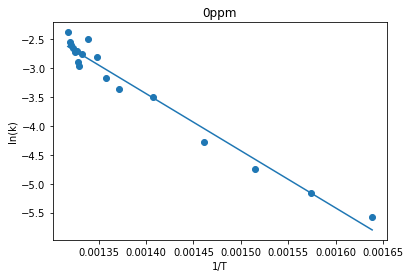

----------------------------------------------------------
CASE : 200ppm
model rmse : 0.15722519235559024
model R2 score : 0.9725632079307045
A : 34289.65014368054
Ea : [19676.52056434]


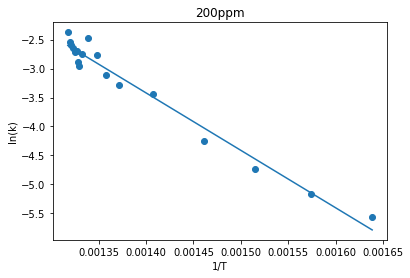

----------------------------------------------------------
CASE : 400ppm
model rmse : 0.15646691182308775
model R2 score : 0.9731125600374567
A : 37907.420659176685
Ea : [19786.23852132]


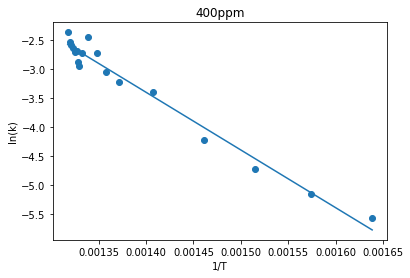

----------------------------------------------------------
CASE : 600ppm
model rmse : 0.15739573419824976
model R2 score : 0.9730824149952162
A : 41690.009728364894
Ea : [19892.23770462]


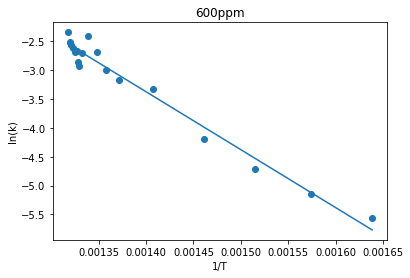

----------------------------------------------------------
CASE : 800ppm
model rmse : 0.15943943366029353
model R2 score : 0.9726602261543631
A : 45497.142292168086
Ea : [19989.99933554]


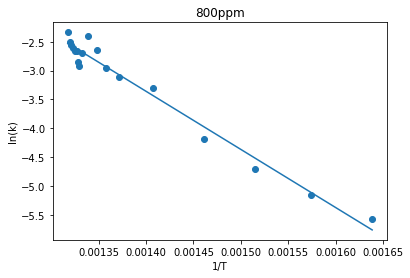

----------------------------------------------------------
CASE : 1000ppm
model rmse : 0.1620592823848087
model R2 score : 0.9720318827652045
A : 49387.109719844964
Ea : [20082.43952127]


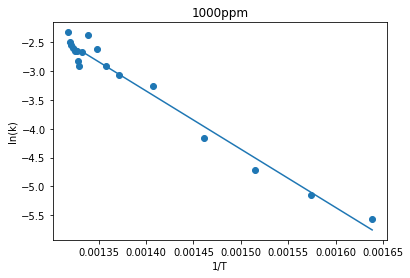

----------------------------------------------------------
CASE : 1200ppm
model rmse : 0.16503456887263707
model R2 score : 0.9712666274999882
A : 53319.32193160059
Ea : [20169.01884455]


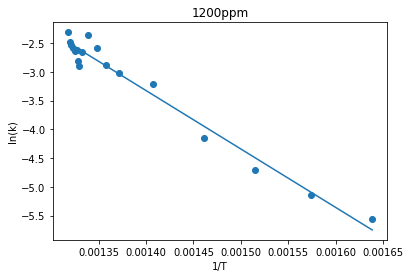

----------------------------------------------------------
CASE : 1400ppm
model rmse : 0.16820516275872252
model R2 score : 0.9704150823728255
A : 57259.98631064409
Ea : [20249.61754954]


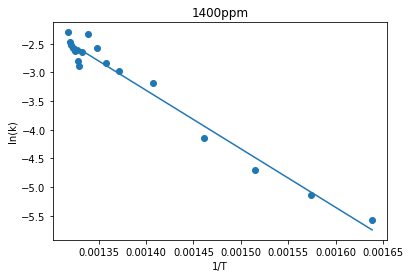

----------------------------------------------------------
CASE : 1600ppm
model rmse : 0.17146293393118614
model R2 score : 0.9695193906188696
A : 61287.81698298796
Ea : [20326.87398282]


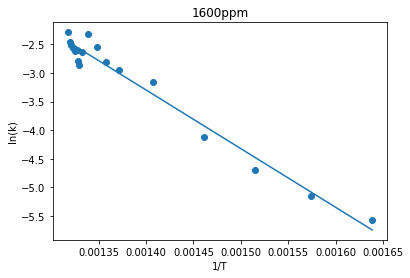

----------------------------------------------------------
CASE : 2000 ppm
model rmse : 0.17796840326709598
model R2 score : 0.9676799436296853
A : 69460.37228258282
Ea : [20469.4717952]


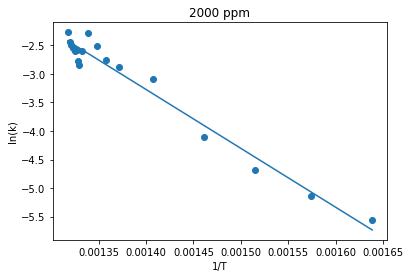

----------------------------------------------------------
CASE : 2500 ppm
model rmse : 0.18579680418708136
model R2 score : 0.9653983770868629
A : 79874.06698581314
Ea : [20628.95385048]


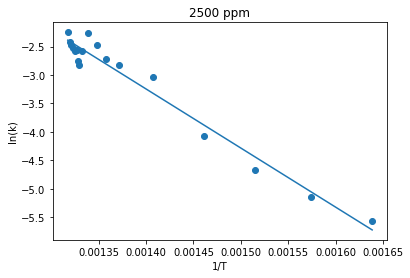

In [277]:
A=[]
Ea=[]
r2=[]
rmse=[]

for i in range(cases_queue.size):
  Atmp, Eatmp,r2tmp, rmsetmp = EDC_crack_derive(cases_queue[i])
  A = np.append(A,Atmp)
  Ea = np.append(Ea,Eatmp)
  r2 = np.append(r2,r2tmp)
  rmse = np.append(rmse,rmsetmp)


In [278]:
A

array([30851.39570942, 34289.65014368, 37907.42065918, 41690.00972836,
       45497.14229217, 49387.10971984, 53319.3219316 , 57259.98631064,
       61287.81698299, 69460.37228258, 79874.06698581])

In [279]:
Ea

array([19564.06614809, 19676.52056434, 19786.23852132, 19892.23770462,
       19989.99933554, 20082.43952127, 20169.01884455, 20249.61754954,
       20326.87398282, 20469.4717952 , 20628.95385048])

In [280]:
df = pd.DataFrame({"ppm":cases_queue,'A':A,'Ea':Ea,"r2":r2,"rmse":rmse})
df

,ppm,A,Ea,r2,rmse
0,0ppm,30851.395709,19564.066148,0.970962,0.160956
1,200ppm,34289.650144,19676.520564,0.972563,0.157225
2,400ppm,37907.420659,19786.238521,0.973113,0.156467
3,600ppm,41690.009728,19892.237705,0.973082,0.157396
4,800ppm,45497.142292,19989.999336,0.972660,0.159439
5,1000ppm,49387.109720,20082.439521,0.972032,0.162059
6,1200ppm,53319.321932,20169.018845,0.971267,0.165035
7,1400ppm,57259.986311,20249.617550,0.970415,0.168205
8,1600ppm,61287.816983,20326.873983,0.969519,0.171463
9,2000 ppm,69460.372283,20469.471795,0.967680,0.177968
